<a href="https://colab.research.google.com/github/Gilangp/Machine-learning/blob/main/week%2010/TG1_JS10_Gilang_Purnomo_2341720042.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas LAB 1**

Nama  : Gilang Purnomo

NIM   : 2341720042

Absen : 14

## 1. Buatlah model klasifikasi dengan menggunakan kNN untuk mengklasifikasikan jenis suara `male` dan `female` pada dataset `voice.csv`.

In [ ]:
# import library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load Data
df = pd.read_csv("voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
df.info()
df.describe()
df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

,count
label,
male,1584
female,1584


In [ ]:
# Preprocessing

X = df.drop('label', axis=1)
y = df['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)
print("=== HASIL MODEL kNN DASAR ===")
print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=['female', 'male']))

=== HASIL MODEL kNN DASAR ===
Akurasi: 0.9763
              precision    recall  f1-score   support

      female       0.99      0.97      0.98       317
        male       0.97      0.99      0.98       317

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



## 2. Lakukan percobaan untuk mengetahui fitur-fitur yang paling optimal untuk digunakan. Fitur apa saja yang Anda gunakan untuk mendapatkan hasil terbaik?

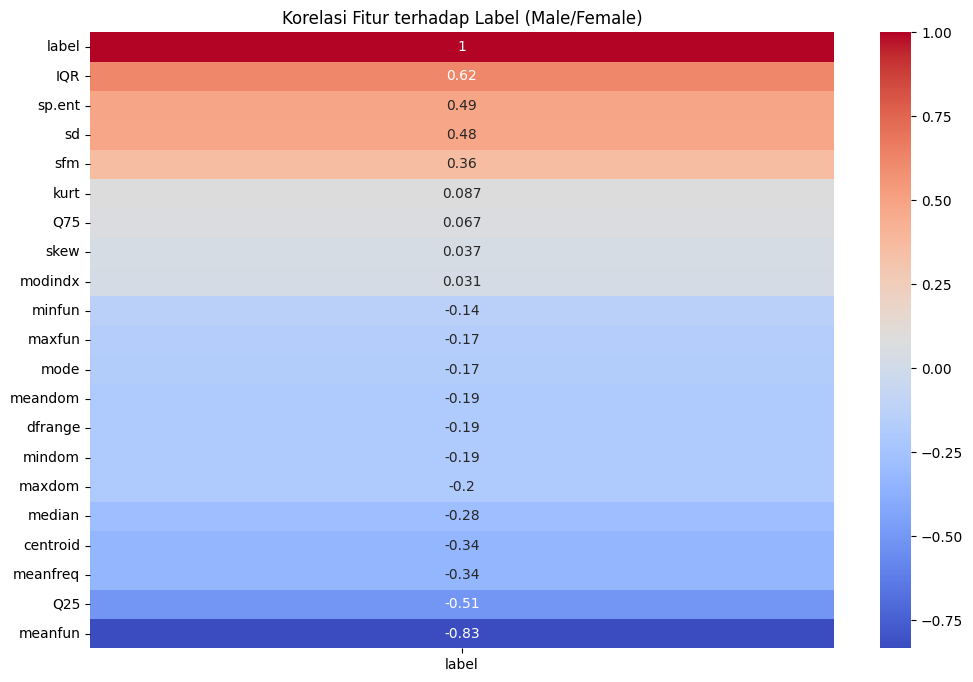

In [ ]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr[['label']].sort_values(by='label', ascending=False), annot=True, cmap='coolwarm')
plt.title("Korelasi Fitur terhadap Label (Male/Female)")
plt.show()

In [ ]:
fitur_set = {
    'semua_fitur': X.columns,
    '5_fitur_utama': ['meanfreq','IQR','sp.ent','meanfun','minfun'],
    '3_fitur_utama': ['meanfreq','meanfun','sp.ent']
}

for nama, fitur in fitur_set.items():
    X_sub = df[fitur]
    X_scaled = scaler.fit_transform(X_sub)
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{nama}: akurasi = {acc:.3f}")

semua_fitur: akurasi = 0.976
5_fitur_utama: akurasi = 0.984
3_fitur_utama: akurasi = 0.973


## 3. Berdasarkan fitur yang telah Anda pilih pada soal nomor 2, berapa nilai k yang terbaik? Lampirkan grafika analisis dan alasan Anda.

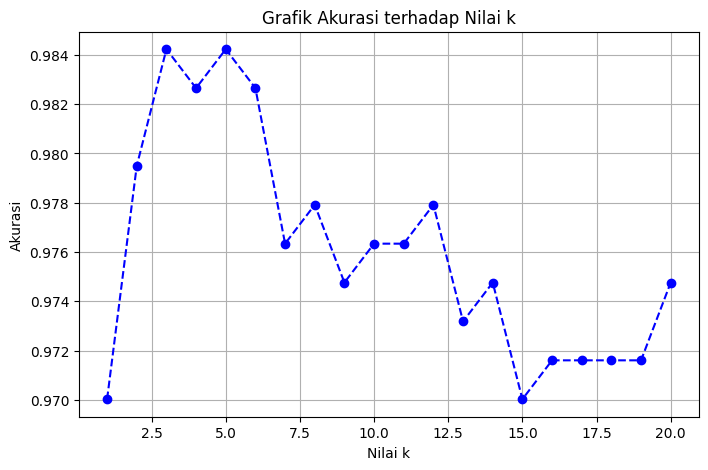


Nilai k terbaik: 3
Akurasi maksimal: 0.984


In [ ]:
X_best = df[['meanfreq','IQR','sp.ent','meanfun','minfun']]
X_scaled = scaler.fit_transform(X_best)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.plot(range(1,21), accuracies, marker='o', linestyle='--', color='b')
plt.title("Grafik Akurasi terhadap Nilai k")
plt.xlabel("Nilai k")
plt.ylabel("Akurasi")
plt.grid(True)
plt.show()

best_k = np.argmax(accuracies) + 1
print(f"\nNilai k terbaik: {best_k}")
print(f"Akurasi maksimal: {max(accuracies):.3f}")

Nilai k = 3 dipilh sebagaiyang terbaik karena memberikanakurasi yang tinggi sebesar 98,4%. Pada nilai k yang lebih besar, akurasi cenderung menurun karena model menjadi terlalu umum dalam pengelompkan data(underfitting), sedangkan k yang lebih kecil, hasilnya malah kurang stabil. Jadi, nilai k = 3 memberikan hasil paling akurat dan konsisten untuk membedakan suara male dan female